# IMPORTS

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 6.9 kB/s 
     |████████████████████████████████| 578.1 MB 28 kB/s 
     |████████████████████████████████| 578.0 MB 18 kB/s 
     |████████████████████████████████| 511.8 MB 29 kB/s 


In [ ]:
!pip list

Package                       Version
----------------------------- ----------------------
absl-py                       1.3.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.3
aiosignal                     1.3.1
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
asynctest                     0.13.0
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.9
bokeh

In [ ]:
import tensorflow as tf
import os

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[]

In [ ]:
# Avoid overuse of Gpu and keeps usage in check
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

# REMOVING UNSUPORTED FORMAT

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = r'/content/drive/MyDrive/CNN'
os.listdir(os.path.join(data_dir, 'usa'))

['twi5.jpg',
 'greek12.jpg',
 'english90.jpg',
 'mandarin58.jpg',
 'english95.jpg',
 'english97.jpg',
 'kikongo1.jpg',
 'yiddish3.jpg',
 'english92.jpg',
 'korean42.jpg',
 'english98.jpg',
 'english81.jpg',
 'mandarin7.jpg',
 'english78.jpg',
 'english93.jpg',
 'french18.jpg',
 'yupik1.jpg',
 'english71.jpg',
 'english60.jpg',
 'english62.jpg',
 'english572.jpg',
 'english563.jpg',
 'english577.jpg',
 'english66.jpg',
 'english570.jpg',
 'english528.jpg',
 'english535.jpg',
 'english551.jpg',
 'english536.jpg',
 'english532.jpg',
 'english67.jpg',
 'english556.jpg',
 'english559.jpg',
 'english537.jpg',
 'english79.jpg',
 'english82.jpg',
 'english567.jpg',
 'english544.jpg',
 'english96.jpg',
 'english539.jpg',
 'english99.jpg',
 'english75.jpg',
 'english88.jpg',
 'english576.jpg',
 'english558.jpg',
 'english562.jpg',
 'english568.jpg',
 'english555.jpg',
 'english565.jpg',
 'english59.jpg',
 'english65.jpg',
 'english70.jpg',
 'english534.jpg',
 'english552.jpg',
 'english9.jpg',
 

In [ ]:
image_exts = ['jpeg','jpg','bmp','png']

In [ ]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [ ]:
for image_class in os. listdir (data_dir):
     for image in os.listdir(os.path.join(data_dir, image_class)):
         image_path = os.path.join(data_dir, image_class, image)
         try:
             img = cv2.imread(image_path)
             tip = imghdr.what(image_path)
             if tip not in image_exts:
                 print('Image not in ext list {}'.format (image_path))
                 os. remove(image_path)
         except Exception as e:
             print('Issue with image {}'.format(image_path))
             # os.remove(image_path)


# LOAD DATA

In [ ]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/CNN')

Found 457 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
data_iterator

In [ ]:
#get another batch from the iterator
batch = data_iterator.next()

In [ ]:
#images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [ ]:
#
batch[1]

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int32)

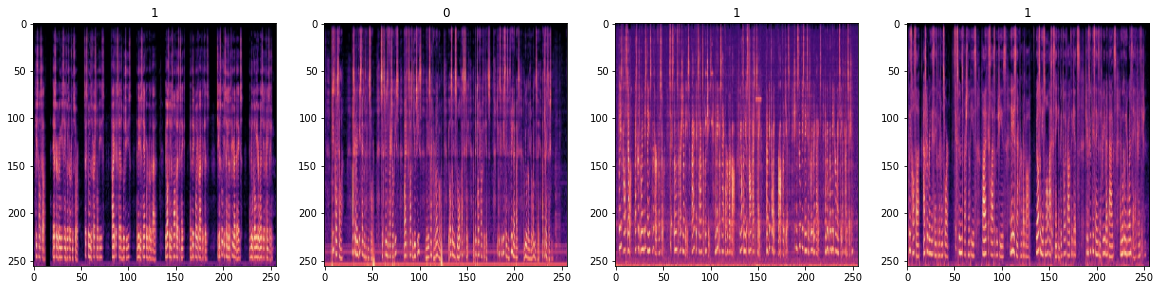

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
scaled = batch[0]/255

In [ ]:
scaled.max()

1.0

# **PREPROCESSING**

In [ ]:
scaledata = data.map(lambda x,y: (x/255, y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

In [ ]:
batch[0].max()

255.0

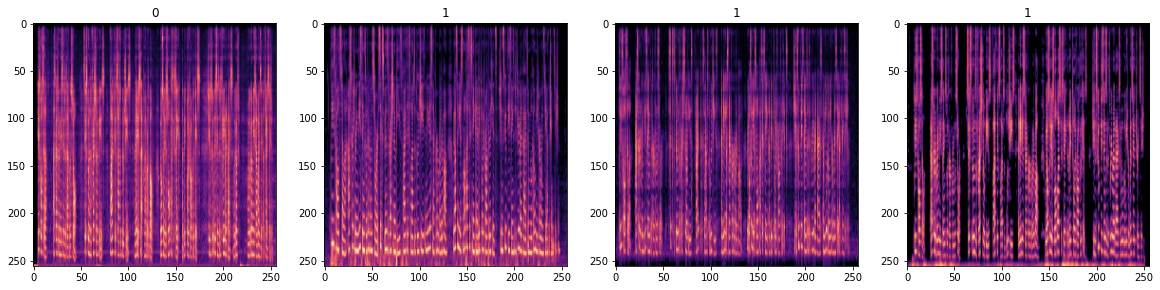

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

# SPLIT DATA

In [ ]:
len(data)

15

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

In [ ]:
train_size + val_size + test_size

15

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
len(val)

4

# **DEEP MODEL**

In [ ]:
#@title Default title text
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# TRAIN

In [ ]:
logdir='log'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
10/10 [==============================] - 26s 2s/step - loss: 33.5384 - accuracy: 0.6656 - val_loss: 0.8510 - val_accuracy: 0.8750
Epoch 2/20
10/10 [==============================] - 23s 2s/step - loss: 0.9054 - accuracy: 0.8531 - val_loss: 0.5450 - val_accuracy: 0.8438
Epoch 3/20
10/10 [==============================] - 23s 2s/step - loss: 0.5494 - accuracy: 0.8625 - val_loss: 0.5341 - val_accuracy: 0.8828
Epoch 4/20
10/10 [==============================] - 26s 3s/step - loss: 0.5202 - accuracy: 0.8719 - val_loss: 0.4566 - val_accuracy: 0.8359
Epoch 5/20
10/10 [==============================] - 23s 2s/step - loss: 0.3964 - accuracy: 0.8625 - val_loss: 0.3024 - val_accuracy: 0.9141
Epoch 6/20
10/10 [==============================] - 23s 2s/step - loss: 0.2764 - accuracy: 0.8969 - val_loss: 0.2978 - val_accuracy: 0.9219
Epoch 7/20
10/10 [==============================] - 23s 2s/step - loss: 0.3059 - accuracy: 0.9250 - val_loss: 0.1285 - val_accuracy: 0.9531
Epoch 8/20
10/10 [=

In [ ]:
hist.history

{'loss': [33.53840255737305,
  0.9053719639778137,
  0.5493935346603394,
  0.5201549530029297,
  0.3963627219200134,
  0.2763928771018982,
  0.30588483810424805,
  0.21561205387115479,
  0.16778461635112762,
  0.08135119080543518,
  0.07839760184288025,
  0.02723832055926323,
  0.013650720939040184,
  0.004330258350819349,
  0.0024558803997933865,
  0.0017432250315323472,
  0.0013616334181278944,
  0.0007425512303598225,
  0.000456896610558033,
  0.0002853035111911595],
 'accuracy': [0.6656249761581421,
  0.8531249761581421,
  0.862500011920929,
  0.871874988079071,
  0.862500011920929,
  0.8968750238418579,
  0.925000011920929,
  0.925000011920929,
  0.9375,
  0.9750000238418579,
  0.981249988079071,
  0.9937499761581421,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.8509951829910278,
  0.5449949502944946,
  0.5341428518295288,
  0.45658135414123535,
  0.30243727564811707,
  0.2977871298789978,
  0.12854701280593872,
  0.17425283789634705,
  0.10853873193264

# PLOTTING MODEL PERFORMANCE

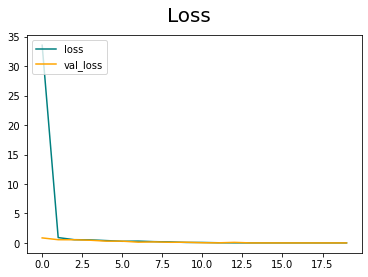

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

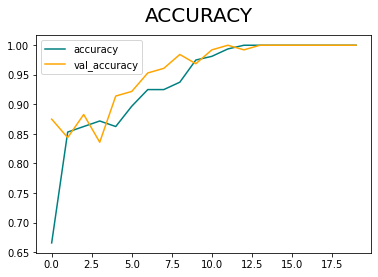

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('ACCURACY', fontsize=20)
plt.legend(loc='upper left')
plt.show()

# EVALUATING PERFORMANE

**Evaluate**

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
#giving instances
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  x,y = batch
  yhat = model.predict(x)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 [==============================] - 0s 263ms/step


In [ ]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


**TEST**

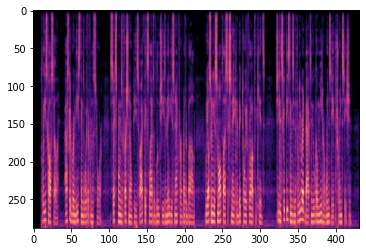

In [ ]:
img = cv2.imread(r'/content/drive/MyDrive/CNN/usa/english118.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

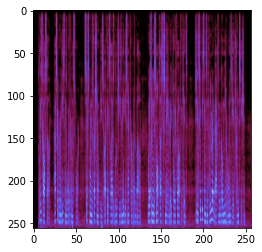

In [ ]:
#@title
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()


In [ ]:
resize.shape

TensorShape([256, 256, 3])

In [ ]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 60ms/step


In [ ]:
yhat

array([[0.58042604]], dtype=float32)

In [ ]:
if yhat >= 0.58:
  print(f'Predicted class is USA')
else:
  print(f'Predicted class is UK')

Predicted class is USA
